In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Load dataset
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
#Descriptive analysis
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
#Checking missing values
df.isnull().sum()/len(df)*100

Ticket #                       0.0
Customer Complaint             0.0
Date                           0.0
Date_month_year                0.0
Time                           0.0
Received Via                   0.0
City                           0.0
State                          0.0
Zip code                       0.0
Status                         0.0
Filing on Behalf of Someone    0.0
dtype: float64

In [7]:
#Covert date into months,day

#get day from the corresponding
df['day'] = pd.DatetimeIndex(df['Date_month_year']).day

# get month from the corresponding 
df['month'] = pd.DatetimeIndex(df['Date_month_year']).month_name()


In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,April
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,August
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,July
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,May


In [9]:
#trend chart for the number of complaints at monthly and daily granularity levels
df.groupby(by='month')['Customer Complaint'].count()

month
April         375
August         67
December       65
February       59
January        55
July           49
June         1046
March          45
May           317
November       38
October        53
September      55
Name: Customer Complaint, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

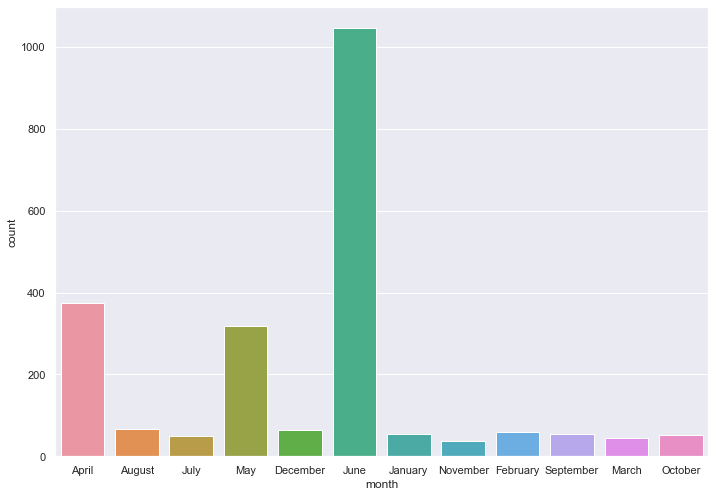

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='month',data=df)

In [11]:
#day wise count of complaints
df.groupby(by='day')['Customer Complaint'].count()

day
4     206
5     131
6     272
13     68
14     54
15     58
16     65
17     60
18     69
19     50
20     51
21     41
22     66
23    225
24    249
25    126
26     90
27     81
28     79
29     87
30     86
31     10
Name: Customer Complaint, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

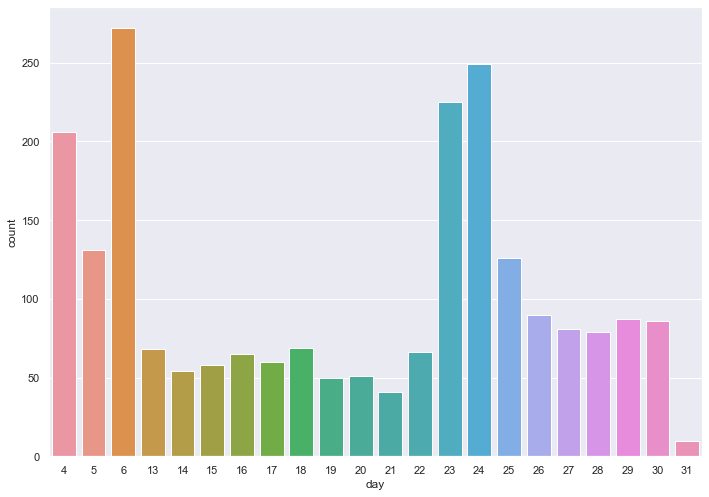

In [12]:
sns.countplot(x='day',data=df)

In [13]:
#frequency of complaint types
df['Customer Complaint'].value_counts()

Comcast                                                     83
Comcast Internet                                            18
Comcast Data Cap                                            17
comcast                                                     13
Comcast Billing                                             11
                                                            ..
Xfinity Comcast hbogo on ps4                                 1
Comcast Internet, cable, and phone outtages                  1
Comcast is giving me the ring around and charged me $130     1
Internet Outage                                              1
Poor internet                                                1
Name: Customer Complaint, Length: 1841, dtype: int64

In [14]:
#complaint types are maximum
df['Customer Complaint'].value_counts().head()

Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Comcast Billing     11
Name: Customer Complaint, dtype: int64

In [15]:
#new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [16]:
df['Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed' )

In [17]:
df.groupby(by='State')['Customer Complaint'].count()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

<AxesSubplot:xlabel='Count', ylabel='State'>

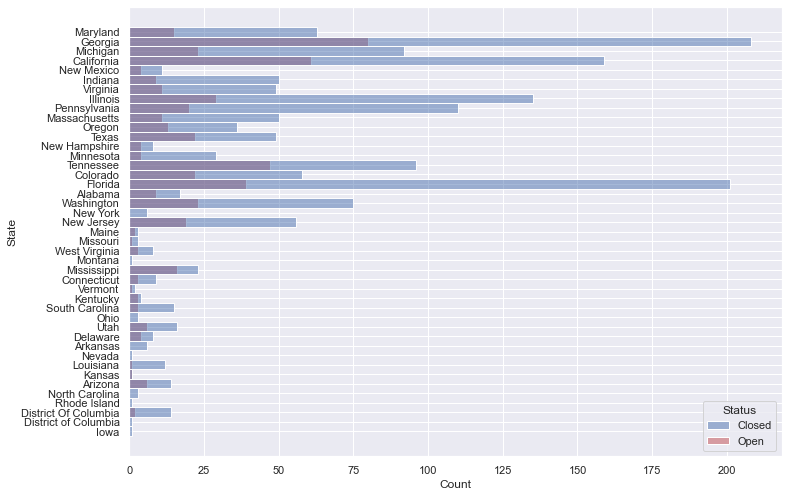

In [20]:
sns.histplot(data=df, y="State", hue='Status',palette=["C0", "C3"])

In [21]:
#Which state has the maximum complaints
'Georgia'

'Georgia'

In [23]:
#highest percentage of unresolved complaints
'Georgia'

'Georgia'

In [24]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64